-----------
----------

# House Price Prediction - Minimal (5 features)

-----------
----------

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Import working libraries

In [ ]:
# --------------------------------------------------------------

In [ ]:
import zipfile

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import joblib

In [ ]:
import json

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Unzip & Load dataset

In [ ]:
# --------------------------------------------------------------

In [ ]:
zip_path = "/content/house-prices-advanced-regression-techniques.zip"

In [ ]:
extract_dir = "/content/house_prices"

In [ ]:
os.makedirs(extract_dir, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

In [ ]:
train_path = os.path.join(extract_dir, "train.csv")

In [ ]:
train_df = pd.read_csv(train_path)

In [ ]:
print("Dataset loaded successfully!")
print(f"Train shape: {train_df.shape}")

Dataset loaded successfully!
Train shape: (1460, 81)


In [ ]:
# --------------------------------------------------------------

In [ ]:
# Basic EDA

In [ ]:
# --------------------------------------------------------------

In [ ]:
print("\n--- Info ---")
print(train_df.info())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

In [ ]:
print("\n--- Missing values (top 20) ---")
print(train_df.isna().sum().sort_values(ascending=False).head(20))


--- Missing values (top 20) ---
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


In [ ]:
print("\n--- Summary statistics ---")
print(train_df.describe().T.head(15))


--- Summary statistics ---
               count          mean          std     min      25%     50%  \
Id            1460.0    730.500000   421.610009     1.0   365.75   730.5   
MSSubClass    1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage   1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea       1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual   1460.0      6.099315     1.382997     1.0     5.00     6.0   
OverallCond   1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt     1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd  1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea    1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1    1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2    1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF     1460.0    567.240411   441.866955     0.0   22

In [ ]:
print("\n--- First 5 rows ---")
print(train_df.head())


--- First 5 rows ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

In [ ]:
# Plot SalePrice distribution and Correlation heatmap (top features) combines

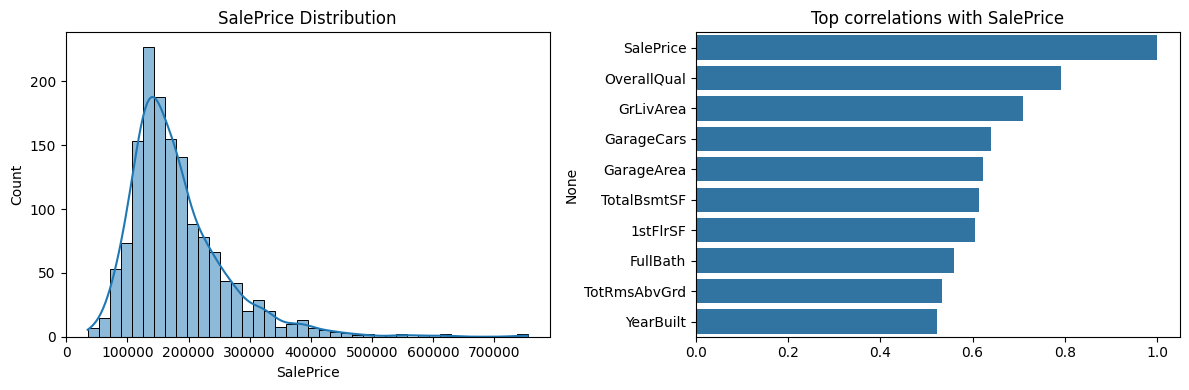

In [ ]:
# Plot SalePrice distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(train_df["SalePrice"], kde=True, bins=40)
plt.title("SalePrice Distribution")

# Correlation heatmap (top features)
plt.subplot(1,2,2)
corr = train_df.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top correlations with SalePrice")
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Keep only required columns

In [ ]:
# --------------------------------------------------------------

In [ ]:
features = ["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street"]


In [ ]:
target = "SalePrice"

In [ ]:
df = train_df[features + [target]].copy()

In [ ]:
df = df.dropna()   # (optional) drop rows with missing values

In [ ]:
X = df[features]

In [ ]:
y = np.log1p(df[target])   # log-transform target for stability

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Preprocessing & Model pipeline

In [ ]:
# --------------------------------------------------------------

In [ ]:
num_cols = ["MSSubClass", "LotFrontage", "LotArea"]

In [ ]:
cat_cols = ["MSZoning", "Street"]

In [ ]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

In [ ]:
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [ ]:
preprocessor = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Train & Evaluate

In [ ]:
# --------------------------------------------------------------

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Street'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
rmse_log = np.sqrt(mean_squared_error(y_val, y_pred))

In [ ]:
rmse_orig = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))


In [ ]:
print(f"\nRMSE (log scale): {rmse_log:.4f}")


RMSE (log scale): 0.3152


In [ ]:
print(f"RMSE (original scale): {rmse_orig:.2f}")

RMSE (original scale): 77126.73


In [ ]:
# --------------------------------------------------------------

In [ ]:
# Plots for visualizing

In [ ]:
# --------------------------------------------------------------

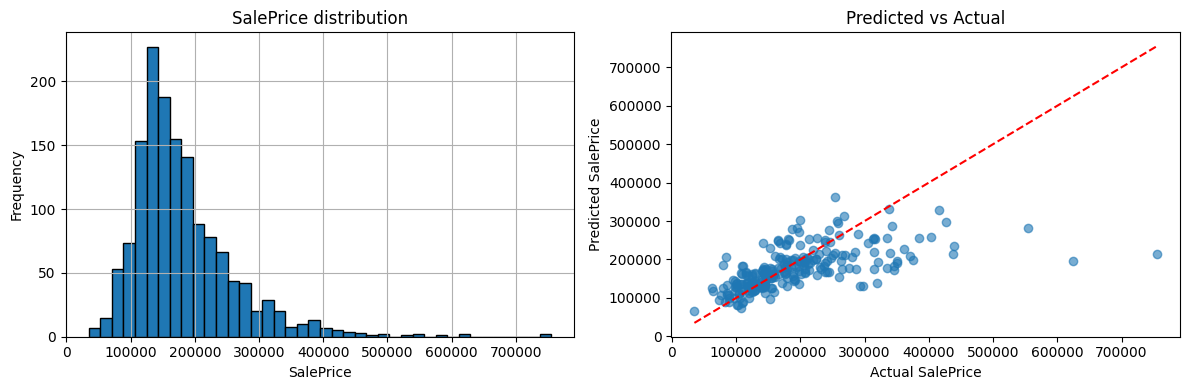

In [ ]:
plt.figure(figsize=(12,4))

# SalePrice distribution
plt.subplot(1,2,1)
train_df["SalePrice"].hist(bins=40, edgecolor='k')
plt.title("SalePrice distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")

# Predicted vs Actual
plt.subplot(1,2,2)
plt.scatter(np.expm1(y_val), np.expm1(y_pred), alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual")
plt.plot([train_df["SalePrice"].min(), train_df["SalePrice"].max()],
         [train_df["SalePrice"].min(), train_df["SalePrice"].max()],
         "r--")
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------------------------

In [ ]:
# Save model & feature list

In [ ]:
# --------------------------------------------------------------

In [ ]:
os.makedirs("/content/models", exist_ok=True)

In [ ]:
joblib.dump(model, "/content/models/house_price_model.joblib")

['/content/models/house_price_model.joblib']

In [ ]:
with open("/content/models/features.json", "w") as f:
    json.dump(features, f)

In [ ]:
print("Model & feature list saved:")
print("   /content/models/house_price_model.joblib")
print("   /content/models/features.json")

Model & feature list saved:
   /content/models/house_price_model.joblib
   /content/models/features.json


# END